In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib as mpl
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
gs = pd.read_csv("D:/chromedownload/유통&소셜 데이터/gs.csv", encoding ='CP949', parse_dates=['date.gs'])

In [3]:
weather = pd.read_csv("D:/chromedownload/유통&소셜 데이터/weather.csv", encoding ='CP949', parse_dates=['date.wt'])

In [4]:
weather_seoul = weather[weather['region_01.wt']=='서울특별시']
weather_seoul.head(1)

,date.wt,region_id,region_01.wt,region_02.wt,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
2192,2016-01-01,108,서울특별시,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0


In [5]:
weather_seoul = weather_seoul.drop(['region_id', 'region_01.wt'], axis=1)
weather_seoul.head(1)

,date.wt,region_02.wt,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
2192,2016-01-01,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0


In [6]:
gs.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,종로구


In [7]:
gs_seoul = gs[gs['reg_01.gs']=='서울특별시']
gs_seoul.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,종로구


## 아웃라이어

In [8]:
gs_seoul_sum = gs_seoul.groupby(['date.gs','cat.gs'])['qty.gs'].sum().unstack().reset_index()

In [9]:
gs_seoul_sum.head(1)

cat.gs,date.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,2016-01-01,45293.0,19183.0,266.0,12811.0,343.0,1993.0,6269.0,2783.0,638.0,15929.0,7.0,3480.0


In [10]:
gs_seoul_sum.head()
name = pd.Series(['과자','라면','마스크','맥주','면도기','생리대','생수','숙취해소제','스타킹','아이스크림','우산','탄산음료'])

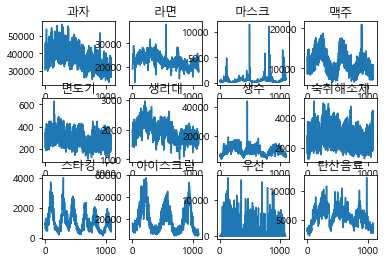

In [11]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,15)

for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(name[i-1])
    value=gs_seoul_sum.iloc[:,i]
    plt.plot(value)

In [12]:
gs_seoul_count = gs_seoul.groupby(['qty.gs','cat.gs'])['cat.gs'].count().unstack().reset_index()

In [13]:
gs_seoul_count.head()

cat.gs,qty.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,7,18706.0,22312.0,20248.0,14779.0,19570.0,30780.0,26795.0,20180.0,24575.0,14516.0,11147.0,28847.0
1,14,16427.0,17721.0,7422.0,11721.0,5599.0,15056.0,16835.0,18272.0,10931.0,13262.0,4808.0,19717.0
2,21,11592.0,11979.0,3195.0,7757.0,2027.0,8627.0,11387.0,10845.0,5728.0,8817.0,2770.0,13882.0
3,28,9037.0,9268.0,1722.0,7809.0,807.0,5426.0,9254.0,8955.0,3555.0,7735.0,1977.0,11203.0
4,35,6648.0,7101.0,1016.0,6494.0,364.0,3847.0,7809.0,6419.0,2367.0,6211.0,1371.0,8777.0


In [14]:
gs_seoul_count.isnull().sum()

cat.gs
qty.gs      0
과자         27
라면        213
마스크       381
맥주        311
면도기       421
생리대       391
생수        216
숙취해소제     384
스타킹       390
아이스크림      89
우산        329
탄산음료      332
dtype: int64

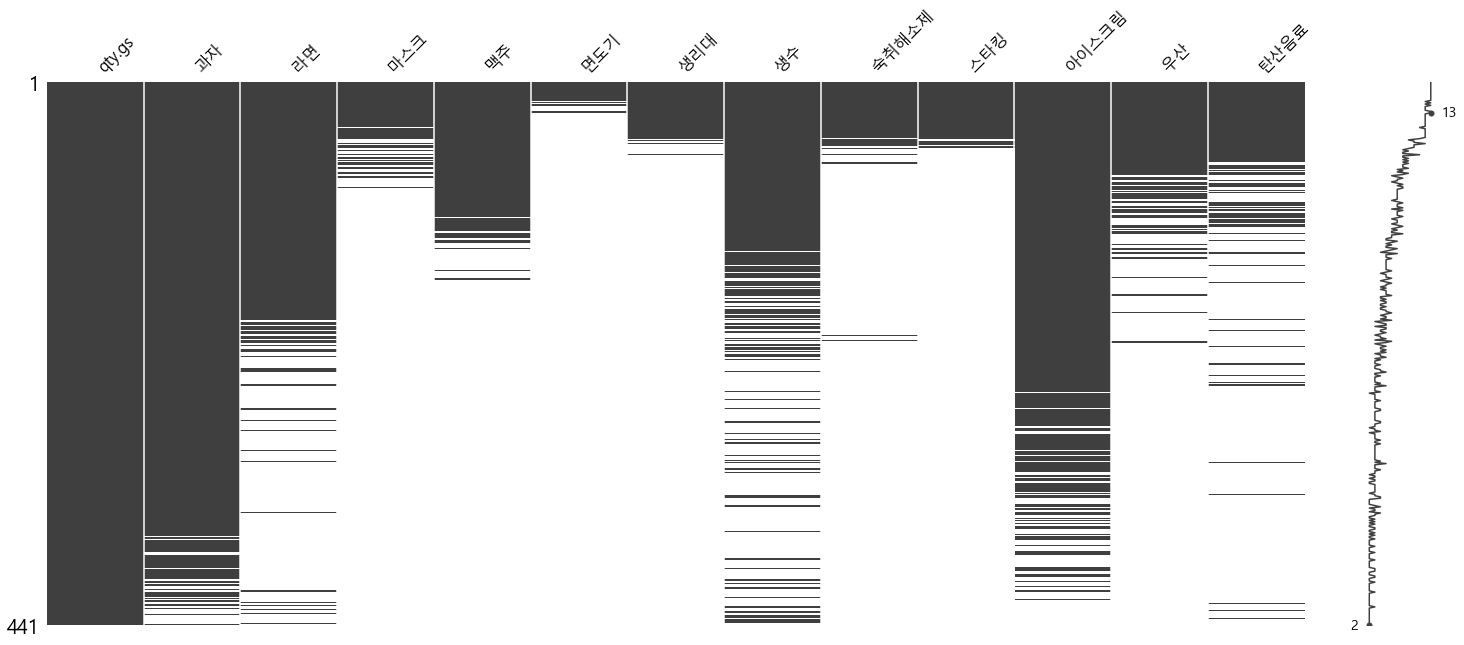

In [15]:
import missingno as msno
msno.matrix(gs_seoul_count)

In [16]:
gs_seoul_count = gs_seoul_count.fillna(0)

In [17]:
name[1]

'라면'

In [18]:
gs_seoul_count.head(1)

cat.gs,qty.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,7,18706.0,22312.0,20248.0,14779.0,19570.0,30780.0,26795.0,20180.0,24575.0,14516.0,11147.0,28847.0


In [19]:
from scipy.stats import skew
from scipy.stats import kurtosis


In [20]:
gs_seoul_count_skew = pd.DataFrame()
gs_seoul_count_kurt = pd.DataFrame()

for col in gs_seoul_count.columns[2:-1]:
    gs_seoul_count_skew = pd.concat([gs_seoul_count_skew, gs_seoul_count.apply(lambda x: skew(x))], axis=1)
    gs_seoul_count_skew.round(2)
    #gs_seoul_count_skew.rename(columns = {col: col+'_skew'}, inplace=True)
gs_seoul_count_skew.reset_index(inplace= True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [21]:
for col in gs_seoul_count.columns[2:-1]:
    gs_seoul_count_kurt = pd.concat([gs_seoul_count_kurt, gs_seoul_count.apply(lambda x: kurtosis(x))], axis=1)
    #gs_seoul_count_kurt.rename(columns = {col: col+'_kurt'}, inplace=True)
gs_seoul_count_kurt.reset_index(inplace= True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
gs_seoul_count_skew=gs_seoul_count_skew.round(2)

In [23]:
gs_seoul_count_kurt = gs_seoul_count_kurt.round(2)

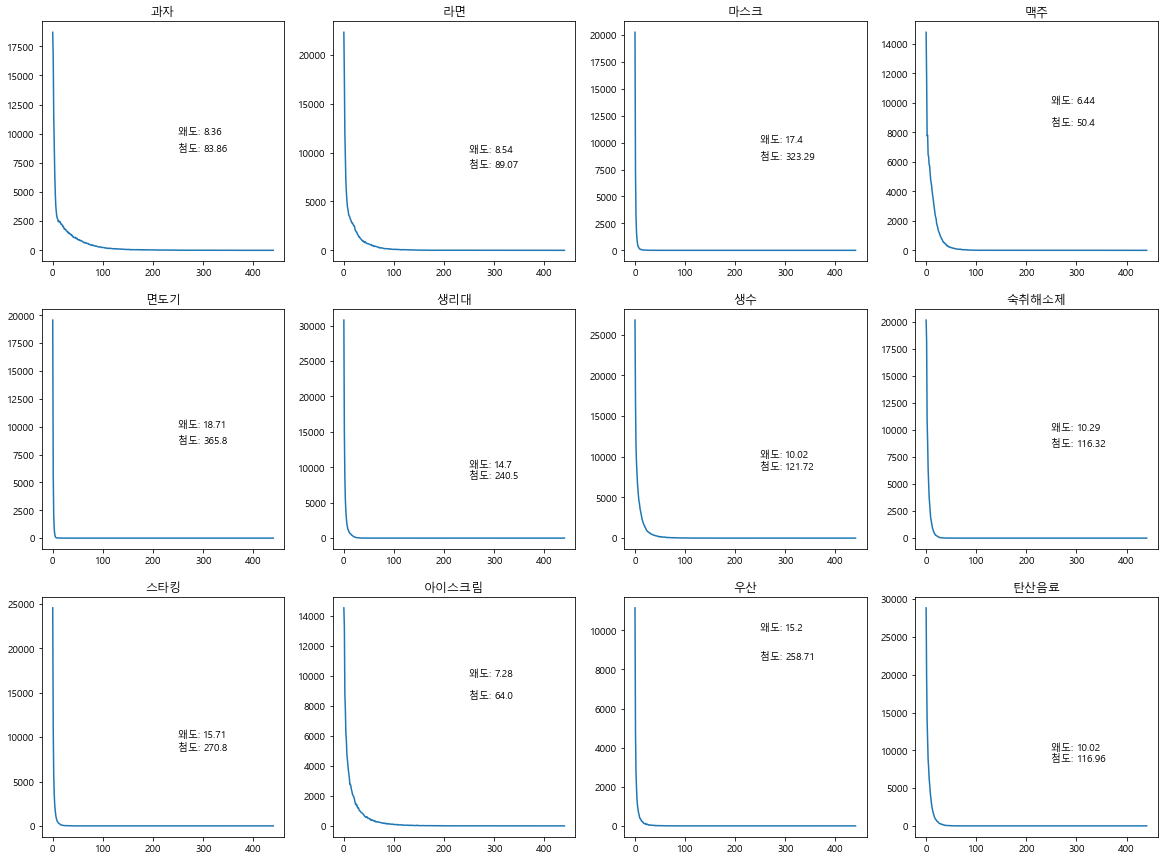

In [24]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,15)

for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(name[i-1])
    plt.text(250,10000,'왜도: ')
    plt.text(250,8500,'첨도: ')
    plt.text(300,10000, gs_seoul_count_skew.iloc[i,1])
    plt.text(300,8500, gs_seoul_count_kurt.iloc[i,1])
    value=gs_seoul_count.iloc[:,i]
    plt.plot(value)

In [25]:
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강남구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "송파구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "마포구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "영등포구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강서구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "관악구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "서초구", "reg_02.gs"] = '4분위수'

gs_seoul.ix[gs_seoul['reg_02.gs'] == "은평구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "성북구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "동작구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "동대문구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "노원구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "광진구", "reg_02.gs"] = '3분위수'

gs_seoul.ix[gs_seoul['reg_02.gs'] == "구로구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "중구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강동구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "중랑구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "서대문구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "양천구", "reg_02.gs"] = '2분위수'

# (금천구, 종로구, 용산구, 강북구, 성동구, 도봉구)
gs_seoul.ix[gs_seoul['reg_02.gs'] == "금천구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "종로구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "용산구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강북구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "성동구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "도봉구", "reg_02.gs"] = '1분위수'

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecate

### 날짜 /구 /  카테고리 분류

In [26]:
gs_seoul.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,1분위수


In [27]:
gs_seoul_1 = gs_seoul.groupby(['date.gs','reg_02.gs','cat.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')
gs_seoul_1=gs_seoul_1.fillna('0')
gs_seoul_1.head()

cat.gs,date.gs,reg_02.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,2016-01-01,1분위수,5853.0,2508.0,77,1659.0,35,253.0,717.0,316.0,77.0,2373.0,0,322.0
1,2016-01-01,2분위수,9280.0,4149.0,49,2480.0,63,378.0,1412.0,779.0,112.0,3105.0,7,828.0
2,2016-01-01,3분위수,9937.0,4113.0,63,2776.0,63,357.0,1055.0,427.0,91.0,2989.0,0,792.0
3,2016-01-01,4분위수,20223.0,8413.0,77,5896.0,182,1005.0,3085.0,1261.0,358.0,7462.0,0,1538.0
4,2016-01-02,1분위수,5529.0,2576.0,35,1838.0,21,246.0,638.0,512.0,105.0,1963.0,0,497.0


In [28]:
gs_seoul_1['과자']=gs_seoul_1['과자'].astype(float)
gs_seoul_1['라면']=gs_seoul_1['라면'].astype(float)
gs_seoul_1['마스크']=gs_seoul_1['마스크'].astype(float)
gs_seoul_1['맥주']=gs_seoul_1['맥주'].astype(float)
gs_seoul_1['면도기']=gs_seoul_1['면도기'].astype(float)
gs_seoul_1['생리대']=gs_seoul_1['생리대'].astype(float)
gs_seoul_1['생수']=gs_seoul_1['생수'].astype(float)
gs_seoul_1['숙취해소제']=gs_seoul_1['숙취해소제'].astype(float)
gs_seoul_1['스타킹']=gs_seoul_1['스타킹'].astype(float)
gs_seoul_1['아이스크림']=gs_seoul_1['아이스크림'].astype(float)
gs_seoul_1['우산']=gs_seoul_1['우산'].astype(float)
gs_seoul_1['탄산음료']=gs_seoul_1['탄산음료'].astype(float)

In [29]:
gs_seoul_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 14 columns):
date.gs      4384 non-null datetime64[ns]
reg_02.gs    4384 non-null object
과자           4384 non-null float64
라면           4384 non-null float64
마스크          4384 non-null float64
맥주           4384 non-null float64
면도기          4384 non-null float64
생리대          4384 non-null float64
생수           4384 non-null float64
숙취해소제        4384 non-null float64
스타킹          4384 non-null float64
아이스크림        4384 non-null float64
우산           4384 non-null float64
탄산음료         4384 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 479.6+ KB


In [30]:
gs_seoul_1['스테디셀러'] = gs_seoul_1['과자']+gs_seoul_1['라면']+gs_seoul_1['숙취해소제']
gs_seoul_1['일회용품'] = gs_seoul_1['면도기']+gs_seoul_1['생리대']
gs_seoul_1['계절성(여름,겨울)'] = gs_seoul_1['맥주']+gs_seoul_1['아이스크림'] +gs_seoul_1['탄산음료']+gs_seoul_1['생수']

In [31]:
gs_seoul_1.head(1) #마스크 우산

cat.gs,date.gs,reg_02.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료,스테디셀러,일회용품,"계절성(여름,겨울)"
0,2016-01-01,1분위수,5853.0,2508.0,77.0,1659.0,35.0,253.0,717.0,316.0,77.0,2373.0,0.0,322.0,8677.0,288.0,5071.0


In [32]:
gs_seoul_1=gs_seoul_1.drop(['과자'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['라면'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['맥주'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['면도기'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['생리대'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['생수'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['숙취해소제'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['아이스크림'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['우산'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['탄산음료'], axis=1)



#'라면','맥주','면도기','생리대', '생수','숙취해소제','아이스크림','우산','탄산음료'])

In [33]:
gs_seoul_1.head(1)

cat.gs,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)"
0,2016-01-01,1분위수,77.0,77.0,8677.0,288.0,5071.0


### 날짜 / 구 / 연령대

In [34]:
gs_seoul_2=gs_seoul.groupby(['date.gs','reg_02.gs','age.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')

In [35]:
gs_seoul_2.head()

age.gs,date.gs,reg_02.gs,00~19,20~39,40~59,60~99
0,2016-01-01,1분위수,357,9203,4293,337
1,2016-01-01,2분위수,497,15798,5885,462
2,2016-01-01,3분위수,659,15310,6204,490
3,2016-01-01,4분위수,945,36204,11067,1284
4,2016-01-02,1분위수,525,9456,3692,287


#### 날짜 / 구 / 성별

In [36]:
gs_seoul_3=gs_seoul.groupby(['date.gs','reg_02.gs','gen.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')

In [37]:
gs_seoul_3.head()

gen.gs,date.gs,reg_02.gs,F,M
0,2016-01-01,1분위수,8250,5940
1,2016-01-01,2분위수,13243,9399
2,2016-01-01,3분위수,13760,8903
3,2016-01-01,4분위수,29628,19872
4,2016-01-02,1분위수,7622,6338


## Merge 이용해 값 합치기

In [38]:
gs_seoul_a=pd.merge(gs_seoul_1, gs_seoul_2, on=['date.gs','reg_02.gs'])

In [39]:
gs_seoul_df=pd.merge(gs_seoul_a,gs_seoul_3, on=['date.gs','reg_02.gs'])

In [40]:
gs_seoul_df.head()

,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)",00~19,20~39,40~59,60~99,F,M
0,2016-01-01,1분위수,77.0,77.0,8677.0,288.0,5071.0,357,9203,4293,337,8250,5940
1,2016-01-01,2분위수,49.0,112.0,14208.0,441.0,7825.0,497,15798,5885,462,13243,9399
2,2016-01-01,3분위수,63.0,91.0,14477.0,420.0,7612.0,659,15310,6204,490,13760,8903
3,2016-01-01,4분위수,77.0,358.0,29897.0,1187.0,17981.0,945,36204,11067,1284,29628,19872
4,2016-01-02,1분위수,35.0,105.0,8617.0,267.0,4936.0,525,9456,3692,287,7622,6338


### Weather 자료와 Merge

In [41]:
weather_seoul = weather_seoul.rename(columns={'date.wt':'date.gs', 'region_02.wt':'reg_02.gs'})

In [42]:
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강남구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "송파구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "마포구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "영등포구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강서구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "관악구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "서초구", "reg_02.gs"] = '4분위수'

weather_seoul.ix[weather_seoul['reg_02.gs'] == "은평구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "성북구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "동작구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "동대문구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "노원구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "광진구", "reg_02.gs"] = '3분위수'

weather_seoul.ix[weather_seoul['reg_02.gs'] == "구로구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "중구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강동구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "중랑구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "서대문구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "양천구", "reg_02.gs"] = '2분위수'

# (금천구, 종로구, 용산구, 강북구, 성동구, 도봉구)
weather_seoul.ix[weather_seoul['reg_02.gs'] == "금천구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "종로구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "용산구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강북구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "성동구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "도봉구", "reg_02.gs"] = '1분위수'

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doi

In [43]:
weather_seoul=weather_seoul.sort_values(by=['date.gs','reg_02.gs'])

#weather_seoul_1 = weather_seoul.iloc(0:365,)

In [44]:
weather_seoul_mean=weather_seoul.groupby(['date.gs','reg_02.gs']).mean().round(1).fillna(0)

## GS와 Weather 합치기

In [45]:
seoul_df=pd.merge(gs_seoul_df, weather_seoul_mean, on=['date.gs','reg_02.gs'])

In [46]:
seoul_df.tail(100)

,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)",00~19,20~39,40~59,60~99,F,M,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
4284,2018-12-07,1분위수,119.0,189.0,9833.0,336.0,3676.0,561,9061,4335,196,8320,5833,-0.5,5.4,-8.7,-6.6,38.5,3.2,0.0
4285,2018-12-07,2분위수,189.0,189.0,12108.0,561.0,4875.0,856,12178,4552,336,11573,6349,-0.9,5.7,-9.2,-6.9,39.0,3.2,0.0
4286,2018-12-07,3분위수,133.0,154.0,11603.0,406.0,4784.0,728,11052,5034,266,10445,6635,-0.9,5.5,-9.7,-7.0,38.2,2.9,0.0
4287,2018-12-07,4분위수,448.0,484.0,27656.0,977.0,9987.0,728,26475,11347,1002,22692,16860,-0.4,5.8,-8.5,-6.6,38.0,3.6,0.0
4288,2018-12-08,1분위수,91.0,70.0,9302.0,294.0,3363.0,385,8248,3954,533,7299,5821,-3.7,5.1,-10.3,-7.4,37.2,2.6,0.0
4289,2018-12-08,2분위수,238.0,147.0,13190.0,393.0,5297.0,518,13514,4911,322,11972,7293,-4.0,5.0,-11.0,-8.0,38.3,2.7,0.0
4290,2018-12-08,3분위수,210.0,161.0,13315.0,371.0,5559.0,609,13232,5411,364,11361,8255,-3.8,4.6,-11.1,-8.0,36.8,2.2,0.0
4291,2018-12-08,4분위수,532.0,455.0,27226.0,857.0,11575.0,1044,28422,10374,805,24127,16518,-4.0,4.6,-10.3,-7.6,38.0,2.7,0.0
4292,2018-12-09,1분위수,77.0,63.0,8944.0,273.0,3731.0,406,8034,4361,287,7293,5795,-2.2,3.6,-10.6,-6.3,31.2,1.6,0.0
4293,2018-12-09,2분위수,126.0,91.0,13198.0,308.0,5424.0,476,13418,4861,392,10912,8235,-2.6,3.3,-11.4,-7.0,34.3,1.5,0.0


# 머신러닝 추가


In [47]:
seoul_df=pd.DataFrame(data=seoul_df)

In [48]:
seoul_df.columns=['date', 'reg', 'mask','starking','steadyseller', 'oneuse','season','under20','20_40','40_60','over60','F','M','temp_max','wind_max','temp_min','temp_avg','rhumid_avg','wa_avg', 'rain_sum']

In [49]:
seoul_df_1=seoul_df.iloc[0:,[0,1,3,4,5,6, 16,17,18, 3,4,5,6]]
# 최대온도, 최대, 최소 값등은 각 독립변수간에 다중공선성의 영향을 미칠 것 같아서 일단 제외함
# 마스크도 마찬가지로 미세먼지 데이터가 추가되었을때 추가로 분석하기 위해서 제외

In [50]:
seoul_df_1.columns=['date', 'reg', 'starking','steadyseller', 'oneuse','season','temp_avg','rhumid_avg','wa_avg','starking_1','steadyseller_1', 'oneuse_1','season_1']

In [51]:
seoul_df_1_1 = seoul_df_1[seoul_df_1['reg']=='1분위수']
seoul_df_1_2 = seoul_df_1[seoul_df_1['reg']=='2분위수']
seoul_df_1_3 = seoul_df_1[seoul_df_1['reg']=='3분위수']
seoul_df_1_4 = seoul_df_1[seoul_df_1['reg']=='4분위수']
seoul_df_1_1.tail(1)

,date,reg,starking,steadyseller,oneuse,season,temp_avg,rhumid_avg,wa_avg,starking_1,steadyseller_1,oneuse_1,season_1
4380,2018-12-31,1분위수,119.0,8530.0,252.0,3349.0,-4.6,42.8,1.2,119.0,8530.0,252.0,3349.0


In [52]:
seoul_df_1_1.starking_1=seoul_df_1_1.starking_1.shift(-1)
seoul_df_1_1.steadyseller_1=seoul_df_1_1.steadyseller_1.shift(-1)
seoul_df_1_1.oneuse_1=seoul_df_1_1.oneuse_1.shift(-1)
seoul_df_1_1.season_1=seoul_df_1_1.season_1.shift(-1)

seoul_df_1_2.starking_1=seoul_df_1_2.starking_1.shift(-1)
seoul_df_1_2.steadyseller_1=seoul_df_1_2.steadyseller_1.shift(-1)
seoul_df_1_2.oneuse_1=seoul_df_1_2.oneuse_1.shift(-1)
seoul_df_1_2.season_1=seoul_df_1_2.season_1.shift(-1)

seoul_df_1_3.starking_1=seoul_df_1_3.starking_1.shift(-1)
seoul_df_1_3.steadyseller_1=seoul_df_1_3.steadyseller_1.shift(-1)
seoul_df_1_3.oneuse_1=seoul_df_1_3.oneuse_1.shift(-1)
seoul_df_1_3.season_1=seoul_df_1_3.season_1.shift(-1)

seoul_df_1_4.starking_1=seoul_df_1_4.starking_1.shift(-1)
seoul_df_1_4.steadyseller_1=seoul_df_1_4.steadyseller_1.shift(-1)
seoul_df_1_4.oneuse_1=seoul_df_1_4.oneuse_1.shift(-1)
seoul_df_1_4.season_1=seoul_df_1_4.season_1.shift(-1)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [53]:
print(seoul_df_1_1.shape)
print(seoul_df_1_1.tail())

(1096, 13)
           date   reg  starking  steadyseller  oneuse  season  temp_avg  \
4364 2018-12-27  1분위수      98.0        8397.0   288.0  2978.0      -9.3   
4368 2018-12-28  1분위수      84.0        9457.0   315.0  3437.0      -9.7   
4372 2018-12-29  1분위수      91.0        8362.0   203.0  3330.0      -6.8   
4376 2018-12-30  1분위수      49.0        7664.0   280.0  3225.0      -6.2   
4380 2018-12-31  1분위수     119.0        8530.0   252.0  3349.0      -4.6   

      rhumid_avg  wa_avg  starking_1  steadyseller_1  oneuse_1  season_1  
4364        31.0     2.9        84.0          9457.0     315.0    3437.0  
4368        36.0     2.1        91.0          8362.0     203.0    3330.0  
4372        31.5     2.4        49.0          7664.0     280.0    3225.0  
4376        40.2     1.3       119.0          8530.0     252.0    3349.0  
4380        42.8     1.2         NaN             NaN       NaN       NaN  


In [54]:
seoul_df_1_1 = seoul_df_1_1.drop([4380],0) # 한칸 밀려서 결측치가 생긴 값을 삭제 #2018-12-31 일자의 데이터 삭제
seoul_df_1_2 = seoul_df_1_2.drop([4381],0)
seoul_df_1_3 = seoul_df_1_3.drop([4382],0)
seoul_df_1_4 = seoul_df_1_4.drop([4383],0)
print(seoul_df_1_1.tail(1))
print(seoul_df_1_2.tail(1))
print(seoul_df_1_3.tail(1))
print(seoul_df_1_4.tail(1))


           date   reg  starking  steadyseller  oneuse  season  temp_avg  \
4376 2018-12-30  1분위수      49.0        7664.0   280.0  3225.0      -6.2   

      rhumid_avg  wa_avg  starking_1  steadyseller_1  oneuse_1  season_1  
4376        40.2     1.3       119.0          8530.0     252.0    3349.0  
           date   reg  starking  steadyseller  oneuse  season  temp_avg  \
4377 2018-12-30  2분위수     126.0       10522.0   373.0  4549.0      -6.9   

      rhumid_avg  wa_avg  starking_1  steadyseller_1  oneuse_1  season_1  
4377        42.7     1.3       175.0         12109.0     533.0    5390.0  
           date   reg  starking  steadyseller  oneuse  season  temp_avg  \
4378 2018-12-30  3분위수      98.0       10937.0   336.0  4694.0      -7.7   

      rhumid_avg  wa_avg  starking_1  steadyseller_1  oneuse_1  season_1  
4378        41.6     0.9       112.0         11480.0     371.0    5289.0  
           date   reg  starking  steadyseller  oneuse   season  temp_avg  \
4379 2018-12-30  4분위수

In [55]:
date=np.array(seoul_df_1_1.date)
date

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2018-12-28T00:00:00.000000000', '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [56]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

data_train=seoul_df_1_1[seoul_df_1_1.date < '2018-01-01']
data_test = seoul_df_1_1[seoul_df_1_1.date>='2018-01-01']
data_all=seoul_df_1_1['date']

data_train=data_train.iloc[0:,[2,3,4,5,6,7,8,9,10,11,12]] 
data_test=data_test.iloc[0:,[2,3,4,5,6,7,8,9,10,11,12]]

mean = data_train.mean(axis=0)
data_train -= mean
std = data_train.std(axis=0)
data_train /= std

data_test -= mean
data_test /= std
# 각 데이터 정규화


In [57]:
data_test.shape

(364, 11)

In [58]:
data_train.head()

,starking,steadyseller,oneuse,season,temp_avg,rhumid_avg,wa_avg,starking_1,steadyseller_1,oneuse_1,season_1
0,-0.813984,-0.764672,-0.331538,-0.796465,-1.112384,1.001799,-1.585905,-0.541274,-0.823518,-0.644098,-0.843719
4,-0.541987,-0.824132,-0.649271,-0.844396,-0.690079,1.204147,-0.870400,-0.473306,-1.902380,-0.659172,-0.965100
8,-0.473988,-1.903336,-0.664401,-0.965819,-0.652541,1.467813,-1.407029,-0.609242,-2.114388,0.411080,-1.040696
12,-0.609987,-2.115411,0.409838,-1.041442,-1.018538,-0.328791,0.918362,-1.017051,-1.425858,-0.870207,-1.341307
16,-1.017982,-1.426663,-0.876222,-1.342159,-1.431459,-1.125919,0.023981,-0.405338,-0.097341,-1.608831,-1.373604


In [59]:
data_train.shape

(731, 11)

In [107]:
starking=np.array(data_train.starking).reshape(-1,1)
steadyseller=np.array(data_train.steadyseller).reshape(-1,1)
oneuse=np.array(data_train.oneuse).reshape(-1,1)
season=np.array(data_train.season).reshape(-1,1)
temp_avg=np.array(data_train.temp_avg).reshape(-1,1)
rhumid_avg=np.array(data_train.rhumid_avg).reshape(-1,1)
wa_avg=np.array(data_train.wa_avg).reshape(-1,1)

y_train_1=np.array(data_train.starking_1).astype(np.float32).reshape(-1,1)
y_train_2=np.array(data_train.steadyseller_1).astype(np.float32).reshape(-1,1)
y_train_3=np.array(data_train.oneuse_1).astype(np.float32).reshape(-1,1)
y_train_4=np.array(data_train.season_1).astype(np.float32).reshape(-1,1)
y_train= np.vstack([y_train_1,y_train_2, y_train_3,y_train_4]).transpose()
# --train 전처리

starking_t=np.array(data_test.starking).reshape(-1,1)
steadyseller_t=np.array(data_test.steadyseller).reshape(-1,1)
oneuse_t=np.array(data_test.oneuse).reshape(-1,1)
season_t=np.array(data_test.season).reshape(-1,1)
temp_avg_t=np.array(data_test.temp_avg).reshape(-1,1)
rhumid_avg_t=np.array(data_test.rhumid_avg).reshape(-1,1)
wa_avg_t=np.array(data_test.wa_avg).reshape(-1,1)

y_test_1=np.array(data_test.starking_1).astype(np.float32).reshape(-1,1)
y_test_2=np.array(data_test.steadyseller_1).astype(np.float32).reshape(-1,1)
y_test_3=np.array(data_test.oneuse_1).astype(np.float32).reshape(-1,1)
y_test_4=np.array(data_test.season_1).astype(np.float32).reshape(-1,1)
y_test= np.vstack([y_test_1,y_test_2, y_test_3,y_test_4]).transpose()

X_train=np.hstack([starking, steadyseller, oneuse, season, temp_avg, rhumid_avg, wa_avg])#.transpose()
X_test=np.hstack([starking_t, steadyseller_t, oneuse_t, season_t, temp_avg_t, rhumid_avg_t, wa_avg_t])#.transpose()

print(X_train.shape, y_train_1.shape)



(731, 7) (731, 1)


In [61]:
print(X_test.shape, y_test_1.shape,y_test_2.shape,y_test_3.shape)

(364, 7) (364, 1) (364, 1) (364, 1)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear_reg1=LinearRegression().fit(X_train,y_train_1)
linear_reg2=LinearRegression().fit(X_train,y_train_2)
linear_reg3=LinearRegression().fit(X_train,y_train_3)
linear_reg4=LinearRegression().fit(X_train,y_train_4)



In [63]:
pred_lr_1=linear_reg1.predict(X_test)
y_test_1=y_test_1[:-1]
pred_lr_1=pred_lr_1[1:]

pred_lr_2=linear_reg2.predict(X_test)
y_test_2=y_test_2[:-1]
pred_lr_2=pred_lr_2[1:]

pred_lr_3=linear_reg3.predict(X_test)
y_test_3=y_test_3[:-1]
pred_lr_3=pred_lr_3[1:]

pred_lr_4=linear_reg4.predict(X_test)
y_test_4=y_test_4[:-1]
pred_lr_4=pred_lr_4[1:]




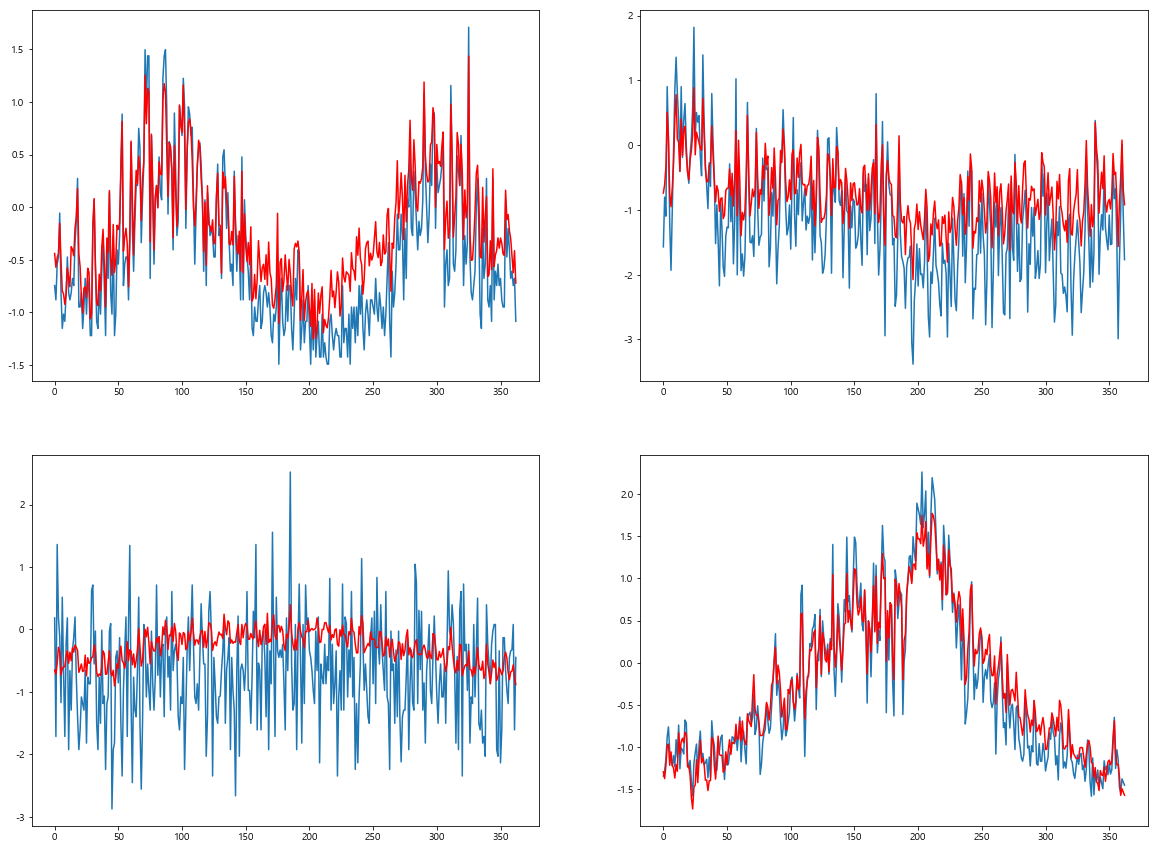

In [64]:
import numpy as np
import matplotlib.pyplot as plt
date=range(363)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_lr_1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_lr_2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_lr_3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_lr_4, 'r-')

plt.show()
#선형모델 예측결과

#1회용품결과는 매우 떨어짐

In [71]:
mse=pred_lr_1-y_test_1
x=0
for x in mse:
    x=x+x**2
x=x/len(mse)
print(x)

[0.00136462]


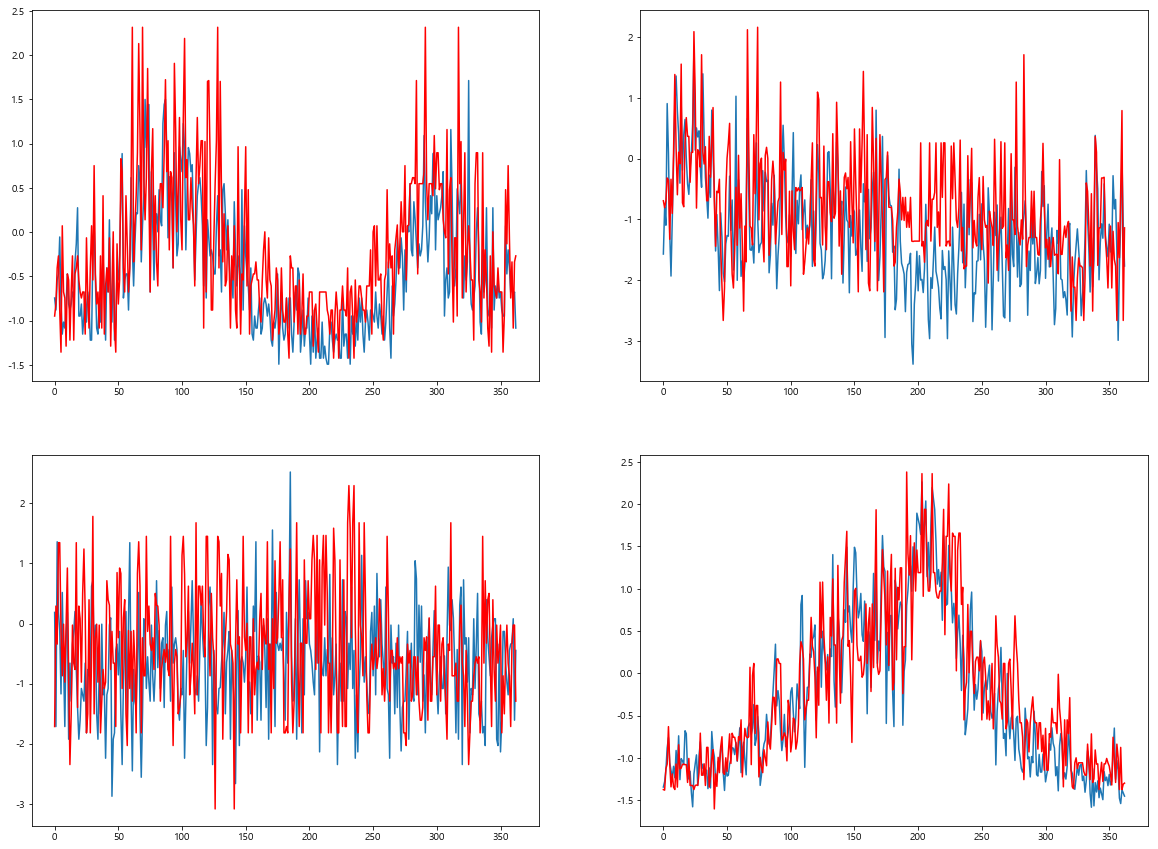

In [68]:
from sklearn.tree import DecisionTreeRegressor

# 코드 실행전 데이터전처리 열 재실행 후 실행
tree1 = DecisionTreeRegressor().fit(X_train,y_train_1)
tree2 = DecisionTreeRegressor().fit(X_train,y_train_2)
tree3 = DecisionTreeRegressor().fit(X_train,y_train_3)
tree4 = DecisionTreeRegressor().fit(X_train,y_train_4)

pred_tree1=tree1.predict(X_test)
pred_tree2=tree2.predict(X_test)
pred_tree3=tree3.predict(X_test)
pred_tree4=tree4.predict(X_test)

y_test_1=y_test_1[:-1]
pred_tree1=pred_tree1[1:]

y_test_2=y_test_2[:-1]
pred_tree2=pred_tree2[1:]

y_test_3=y_test_3[:-1]
pred_tree3=pred_tree3[1:]

y_test_4=y_test_4[:-1]
pred_tree4=pred_tree4[1:]

date=range(363)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_tree1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_tree2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_tree3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_tree4, 'r-')

plt.show()

In [92]:
mse=pred_tree1-y_test_1
mse = np.array(mse).reshape(-1,1)
x=0
for x in mse:
    x=x+x**2
x=x/len(mse)
print(x)

[1.12382189e-05]


In [85]:
print("특성중요도 : \n {}".format(tree1.feature_importances_)) # 전날 팔린 스타킹 개수가 다음 날 스타킹 판매에 가장 큰 영향을 끼치는 피쳐

특성중요도 : 
 [0.6282537  0.06300728 0.06353532 0.0547718  0.1044925  0.0452459
 0.0406935 ]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

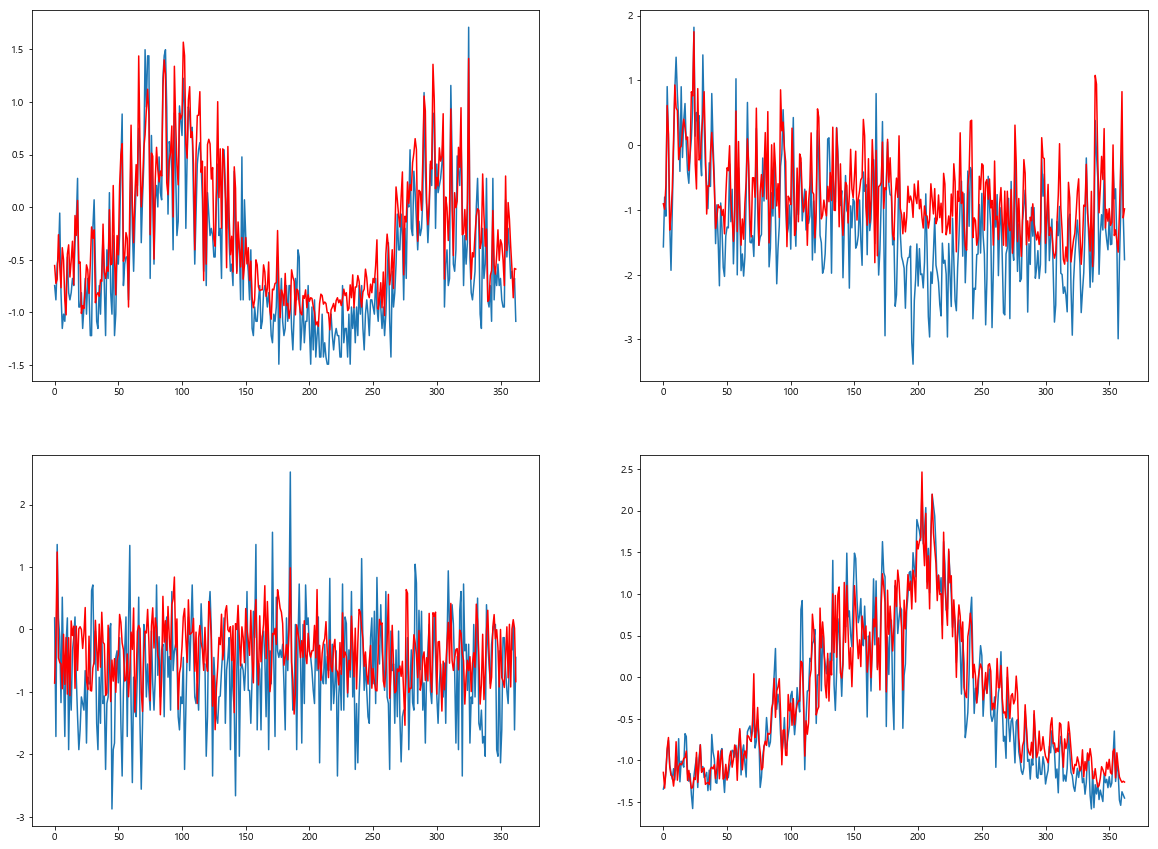

In [91]:
from sklearn.ensemble import RandomForestRegressor

Rtree1 = RandomForestRegressor().fit(X_train,y_train_1)
Rtree2 = RandomForestRegressor().fit(X_train,y_train_2)
Rtree3 = RandomForestRegressor().fit(X_train,y_train_3)
Rtree4 = RandomForestRegressor().fit(X_train,y_train_4)

pred_Rtree1=Rtree1.predict(X_test)
pred_Rtree2=Rtree2.predict(X_test)
pred_Rtree3=Rtree3.predict(X_test)
pred_Rtree4=Rtree4.predict(X_test)

y_test_1=y_test_1[:-1]
pred_Rtree1=pred_Rtree1[1:]

y_test_2=y_test_2[:-1]
pred_Rtree2=pred_Rtree2[1:]

y_test_3=y_test_3[:-1]
pred_Rtree3=pred_Rtree3[1:]

y_test_4=y_test_4[:-1]
pred_Rtree4=pred_Rtree4[1:]

date=range(363)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_Rtree1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_Rtree2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_Rtree3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_Rtree4, 'r-')

plt.show()

In [93]:
mse=pred_Rtree1-y_test_1
mse = np.array(mse).reshape(-1,1)
x=0
for x in mse:
    x=x+x**2
x=x/len(mse)
print(x) # 랜덤포레스트가 그냥 결정트리보다 예측률이 좋음

[5.63371587e-06]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWa

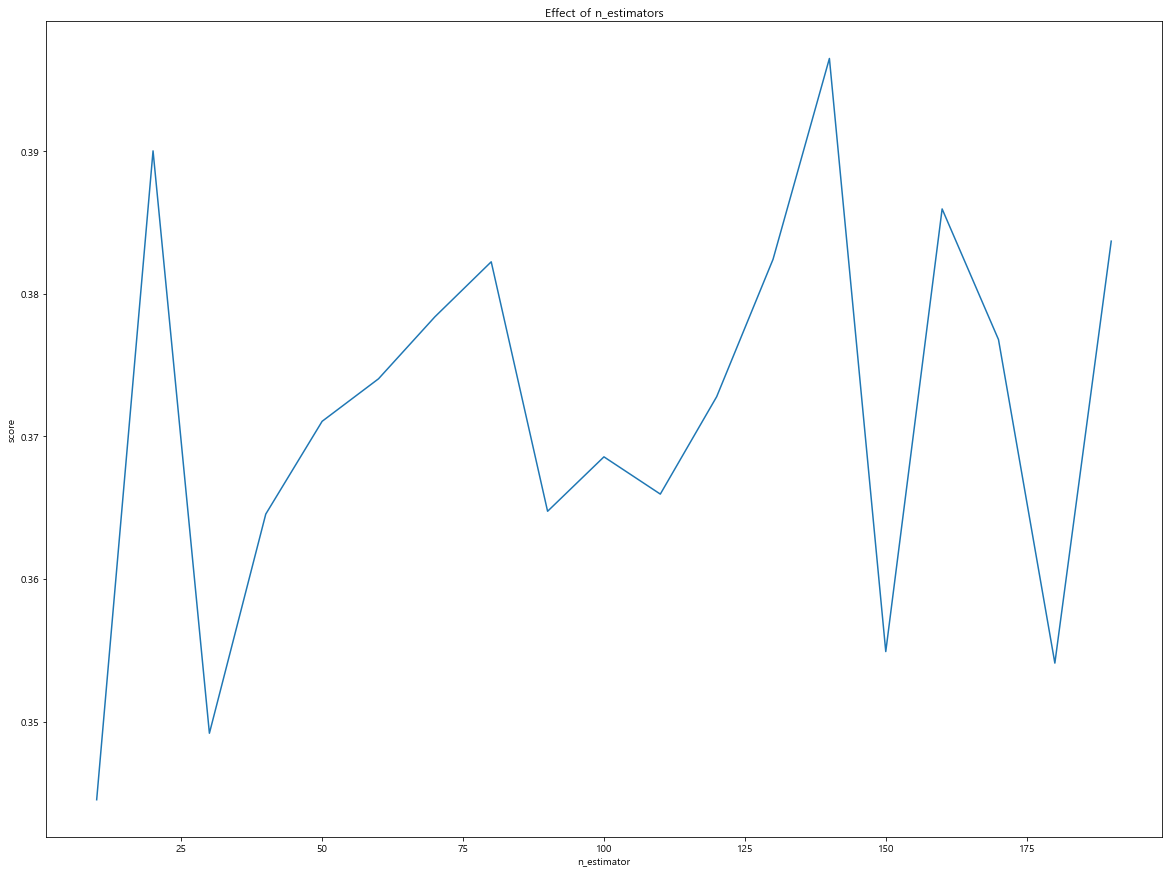

In [90]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_1)
    scores.append(model.score(X_test, y_test_1))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [84]:
mse_tr=pred_tree1-y_test_1
mse_tr = np.array(mse_tr).reshape(-1,1)

i = 0
for i in mse_tr:
    i=i+i**2

print(i/len(mse_tr))

#Tree model의 결과가 선형보다는 좋게 나옴


[1.12382189e-05]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

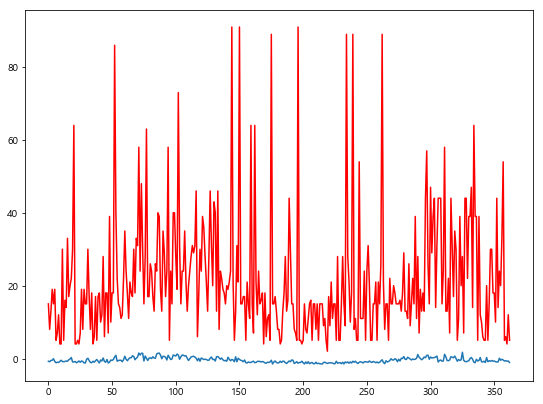

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

gbrt = GradientBoostingClassifier(min_samples_leaf= 4, learning_rate= 0.1, max_depth= 4)

lab_enc = preprocessing.LabelEncoder()
y_train_1 = lab_enc.fit_transform(y_train_1)
y_train_2 = lab_enc.fit_transform(y_train_2)
y_train_3 = lab_enc.fit_transform(y_train_3)
y_train_4 = lab_enc.fit_transform(y_train_4)


gbrt1 =gbrt.fit(X_train, y_train_1)
#gbrt2 =gbrt.fit(X_train, y_train_2)
#gbrt3 =gbrt.fit(X_train, y_train_3)
#gbrt4 =gbrt.fit(X_train, y_train_4)

pred_gbrt1=gbrt1.predict(X_test)
#pred_gbrt2=gbrt2.predict(X_test)
##pred_gbrt3=gbrt3.predict(X_test)
#pred_gbrt4=gbrt4.predict(X_test)

y_test_1=y_test_1[:-1]
pred_gbrt1=pred_gbrt1[1:]
"""
y_test_2=y_test_2[:-1]
pred_gbrt2=pred_gbrt2[1:]

y_test_3=y_test_3[:-1]
pred_gbrt3=pred_gbrt3[1:]

y_test_4=y_test_4[:-1]
pred_gbrt4=pred_gbrt4[1:]
"""
date=range(363)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_gbrt1, 'r-')
"""
plt.subplot(222)
plt.plot(date, y_test_2, date, pred_gbrt2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_gbrt3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_gbrt4, 'r-')
"""
plt.show()

#그래디언트 부스팅 모델은 이 모델과 적합하지 않아보임/ 4개의 예측결과를 한번에 돌릴시 오류 발생
#스타킹의 예측결과를 봤을때 터무니 없는 결과값도출

In [66]:
import tensorflow as tf

In [97]:
tf.reset_default_graph()
n_inputs= 7
n_hidden1 = 8
n_hidden2 =2
n_outputs=1 # 한개씩 따로본다


In [98]:
X=tf.placeholder(tf.float32, shape=(None, n_inputs),name='X')
y=tf.placeholder(tf.float32, shape=(None), name= 'y')

keep_prob = tf.placeholder(tf.float32)


In [99]:
from functools import partial
training= tf.placeholder_with_default(False, shape=(), name='training')

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.5)

In [100]:
X_test.shape, y_test_1.shape

((364, 7), (363, 1))

In [101]:
X_test

array([[-1.15398044, -1.02332414, -2.35897448, ..., -1.33761323,
        -0.78867262, -1.04927641],
       [-0.74598501, -1.57134971,  0.18288613, ..., -1.4033051 ,
        -0.80093613, -0.33377169],
       [-0.88198348, -0.8023301 , -1.72350933, ..., -1.65668801,
        -0.92357119,  0.38173302],
       ...,
       [-0.74598501,  0.0083117 ,  0.07697528, ..., -2.19160749,
        -1.46316546,  0.5606092 ],
       [-0.67798577, -1.07683839, -1.61759847, ..., -1.91945547,
        -1.73909435,  1.09723774],
       [-1.0859812 , -1.76855963, -0.45257902, ..., -1.86314816,
        -1.20563183, -0.87040023]])

In [102]:
#핸즈온머신러닝 p343, p354 참조 tf.dense.layer의 내부
he_init=tf.variance_scaling_initializer()
dropout_rate=0.3 #네트워크 층이 많을 수 록 값을 올린다


hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1=my_batch_norm_layer(hidden1)
bn1_act=tf.nn.elu(bn1)
bn1_dropout= tf.layers.dropout(bn1_act, dropout_rate, training=training)

hidden2 = tf.layers.dense(bn1_dropout, n_hidden2, name='hidden2')
bn2=my_batch_norm_layer(hidden2)
bn2_act=tf.nn.elu(bn2)
bn2_dropout= tf.layers.dropout(bn2_act, dropout_rate, training=training)


hypothesis = tf.layers.dense(bn2_dropout, n_outputs, name='hypothesis')

#hypothesis = my_batch_norm_layer(hypothesis_bn)


In [103]:
learning_rate = 0.01
training_epochs = 50
batch_size = 1 
total_batch = int(X_train.shape[0] / batch_size)
print(total_batch) 


731


In [104]:
cost = tf.reduce_mean(tf.square(y-hypothesis)) #MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

mse=tf.reduce_mean(tf.sqrt(tf.square(y-hypothesis)))

In [105]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        return X_batch, y_batch
    
    #셔플->미니배치

0	검증 세트 손실: 0.061297	최선의 손실: 0.076584473
1	검증 세트 손실: 0.000815	최선의 손실: 0.076584473
2	검증 세트 손실: 0.000469	최선의 손실: 0.076584473
3	검증 세트 손실: 0.000200	최선의 손실: 0.076584473
4	검증 세트 손실: 0.000868	최선의 손실: 0.076584473
5	검증 세트 손실: 0.003833	최선의 손실: 0.076584473
6	검증 세트 손실: 0.000519	최선의 손실: 0.076584473
7	검증 세트 손실: 0.000223	최선의 손실: 0.076584473
8	검증 세트 손실: 0.000212	최선의 손실: 0.076584473
9	검증 세트 손실: 0.000886	최선의 손실: 0.076584473
10	검증 세트 손실: 0.004881	최선의 손실: 0.076584473
11	검증 세트 손실: 0.028677	최선의 손실: 0.029480236
12	검증 세트 손실: 0.006503	최선의 손실: 0.029480236
13	검증 세트 손실: 0.000962	최선의 손실: 0.029480236
14	검증 세트 손실: 0.025368	최선의 손실: 0.011753478
15	검증 세트 손실: 0.000406	최선의 손실: 0.011753478
16	검증 세트 손실: 0.000256	최선의 손실: 0.011753478
17	검증 세트 손실: 0.000435	최선의 손실: 0.011753478
18	검증 세트 손실: 0.000366	최선의 손실: 0.011753478
19	검증 세트 손실: 0.000421	최선의 손실: 0.011753478
20	검증 세트 손실: 0.003967	최선의 손실: 0.011753478
21	검증 세트 손실: 0.000684	최선의 손실: 0.011753478
22	검증 세트 손실: 0.001468	최선의 손실: 0.011753478
23	검증 세트 손실: 0.021941	최선의 손실: 0.002808389
24

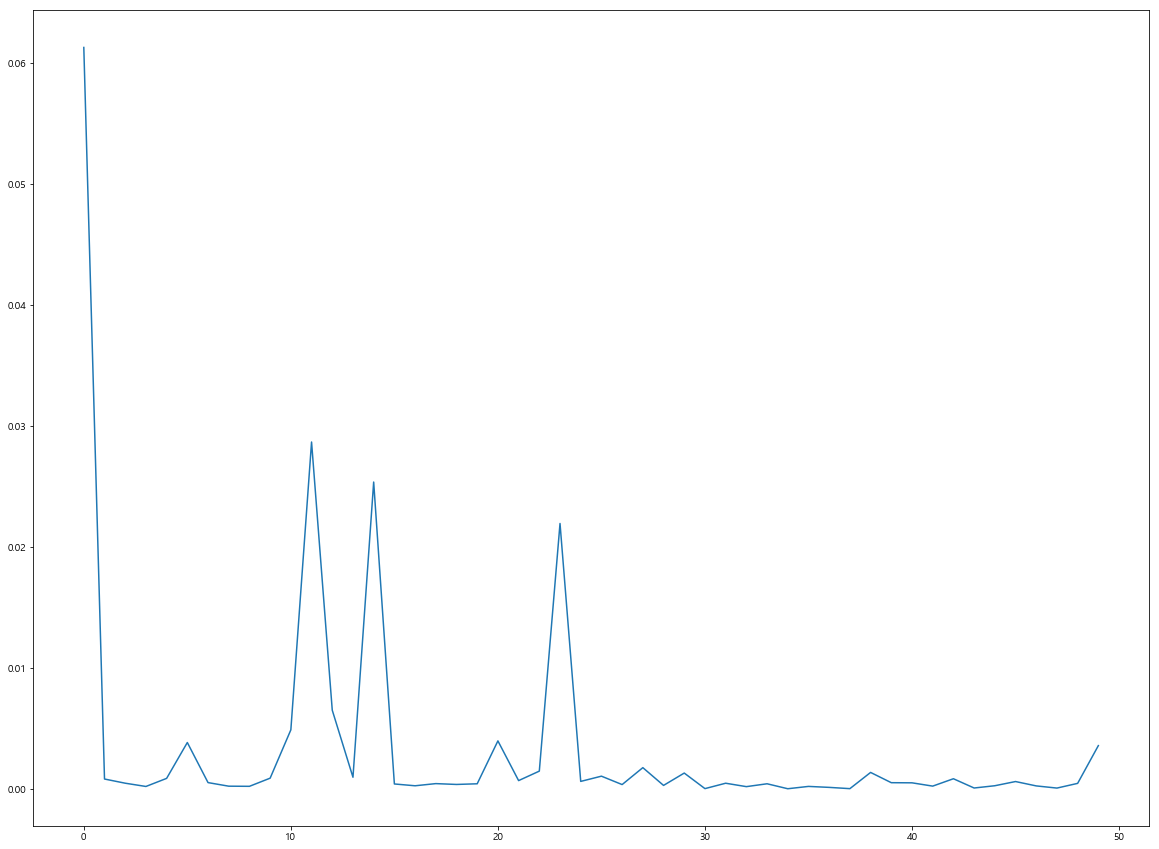

In [106]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #initialize the tensor
sess.run(tf.local_variables_initializer())
saver = tf.train.Saver()

best_loss = np.infty #set the best loss to 
max_checks_without_progress = 20
checks_without_progress = 0   
for_plot=[]
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = shuffle_batch(X_train, y_train_1, batch_size)
      
        c, _ =sess.run([cost, optimizer], feed_dict={X: batch_xs, y:batch_ys, keep_prob: 0.7})
        avg_cost += c 
        
        if avg_cost < best_loss:
            save_path = saver.save(sess, "./seoul1.ckpt")
            best_loss =  avg_cost
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                break
    avg_cost= avg_cost / total_batch
    for_plot.append(avg_cost)
    print("{}\t검증 세트 손실: {:.6f}\t최선의 손실: {:.9f}".format(
            epoch, avg_cost, best_loss))

print('Learning Finished!')

plt.plot(for_plot)
plt.show()


#ValueError: Cannot feed value of shape (101, 2) for Tensor 'y:0', which has shape '(?, 1)'

In [115]:
with tf.Session() as sess:
    saver.restore(sess, "./seoul1.ckpt")
    acc_test = sess.run([cost],feed_dict={X: X_test, y: y_test_1})
    print("테스트 데이터의 RMSE:" ,acc_test)

INFO:tensorflow:Restoring parameters from ./seoul1.ckpt
테스트 데이터의 RMSE: [0.41318223]
